In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
%matplotlib inline

cities_names = np.array([ "Wismar", "Rostok", "Stralsund", "Schwerin","Greifswald", "Neubrandenburg"])
cities_coordinates = np.array([[4,6],[9,8],[13,10],[2,1],[18,8],[17,1]])

leng = 12
neuron_numbers = np.arange(leng)

angles = np.random.randint(0, 360, leng)
angles = angles*math.pi/180
angles = np.sort(angles)
print angles

r = 3
circle_x = np.array([])
circle_y = np.array([])

for angle in angles:
    x = r*math.cos(angle) + 12
    y = r*math.sin(angle) + 4
    circle_x = np.append(circle_x, x)
    circle_y = np.append(circle_y, y)

initial_weights = np.column_stack((circle_x, circle_y))
weights = initial_weights

[ 0.54105207  1.08210414  1.58824962  1.72787596  1.8675023   2.12930169
  2.63544717  3.85717765  4.83456203  4.86946861  5.41052068  5.51524044]


In [57]:
def plot(cities_coordinates, weights):
    fig, ax = plt.subplots()
    ax.scatter(cities_coordinates[:,0], cities_coordinates[:,1], c = 'r')
    ax.scatter(weights[:,0], weights[:,1], c = 'b')

    #ax.annotate(cities_names[0], xy=cities_coordinates[], xytext=(3, 1.5))

    for i in range(len(cities_names)):
        ax.annotate(cities_names[i], (cities_coordinates[i,0],cities_coordinates[i,1]))
    for i in range(len(neuron_numbers)):
        ax.annotate(neuron_numbers[i], (weights[i,0],weights[i,1]))
    plt.plot(np.append(weights[:,0], weights[0,0]), np.append(weights[:,1], weights[0,1]))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

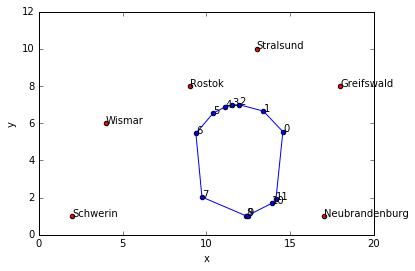

In [58]:
plot(cities_coordinates, weights)

In [59]:
def eta(step):
    return 0.05*(500.0 - step)/500.0
#eta = 0.01

In [60]:
change = 100
step = 0
summ = 100
indices = np.array([])

while(abs(summ) > 0.0001):
    summ = 0
    indices = np.array([])
    for city in cities_coordinates:
        #Determine the winning neuron 
        dists = np.array([])
        for weight in weights:
            dist = math.hypot(city[0]-weight[0], city[1]-weight[1])
            dists = np.append(dists, dist)
        winner_index = np.argmin(dists)
        indices = np.append(indices, winner_index)
        #Adapt the weights of the winner neuron:
        weights[winner_index] = weights[winner_index] + eta(step)*(city - weights[winner_index])
        change = LA.norm(eta(step)*(city - weights[winner_index]))
        summ += change
    step += 1
print step
indices = np.sort(indices)
print indices

224
[  0.   2.   5.   6.   7.  11.]


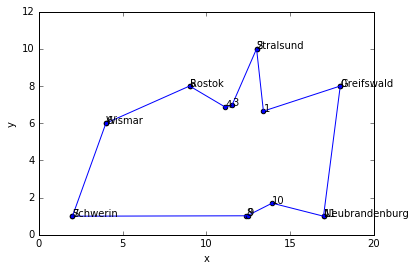

In [61]:
plot(cities_coordinates, weights)

/home/elhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/elhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/elhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


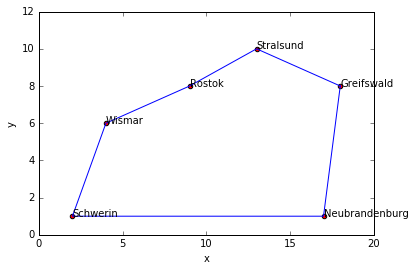

42.6951312272


In [62]:
#drop not needed weights
weights_assigned = weights[indices[0]]
for i in range(1,6):
    weights_assigned = np.row_stack((weights_assigned, weights[indices[i]]))
weights_assigned = np.row_stack((weights_assigned, weights[indices[0]]))

fig, ax = plt.subplots()
ax.scatter(cities_coordinates[:,0], cities_coordinates[:,1], c = 'r')

#ax.annotate(cities_names[0], xy=cities_coordinates[], xytext=(3, 1.5))

length = 0
for i in range(len(cities_names)):
    ax.annotate(cities_names[i], (cities_coordinates[i,0],cities_coordinates[i,1]))
    length += math.hypot(weights_assigned[i,0]-weights_assigned[i+1,0], weights_assigned[i,1]-weights_assigned[i+1,1])
    
plt.plot(weights_assigned[:,0], weights_assigned[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print length